In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
data = pd.read_csv('Absenteeism_at_work.csv')

In [14]:
col_string = list(data.columns)[0]
columns = col_string.split(';')

In [15]:
dataFrame = {}
for i in range(data.shape[0]):
    val = list(data.loc[i])[0]
    values = val.split(';')
    values = list(map(float, values))
    
    for j in range(len(values)):
        if columns[j] in dataFrame:
            dataFrame[columns[j]].append(values[j])
        else:
            dataFrame[columns[j]] = [values[j]]
    
fData = pd.DataFrame(dataFrame)
fData.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11.0,26.0,7.0,3.0,1.0,289.0,36.0,13.0,33.0,239.554,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,4.0
1,36.0,0.0,7.0,3.0,1.0,118.0,13.0,18.0,50.0,239.554,...,1.0,1.0,1.0,1.0,0.0,0.0,98.0,178.0,31.0,0.0
2,3.0,23.0,7.0,4.0,1.0,179.0,51.0,18.0,38.0,239.554,...,0.0,1.0,0.0,1.0,0.0,0.0,89.0,170.0,31.0,2.0
3,7.0,7.0,7.0,5.0,1.0,279.0,5.0,14.0,39.0,239.554,...,0.0,1.0,2.0,1.0,1.0,0.0,68.0,168.0,24.0,4.0
4,11.0,23.0,7.0,5.0,1.0,289.0,36.0,13.0,33.0,239.554,...,0.0,1.0,2.0,1.0,0.0,1.0,90.0,172.0,30.0,2.0


In [16]:
ind = list(fData[fData['Absenteeism time in hours'] == 0].index)
ffData = fData.drop(ind, axis=0)

In [6]:
cat = ['Seasons', 'Disciplinary failure', 'Education', 'Son', 'Social drinker', 'Social smoker', 'Pet']
num = [
    'ID', 'Transportation expense', 'Distance from Residence to Work', 'Service time', 
    'Age', 'Work load Average/day ', 'Hit target', 'Weight', 'Height', 'Body mass index',
    'Absenteeism time in hours'
]

## Hours count

Text(0.5, 1.0, 'Absentee Hour Count')

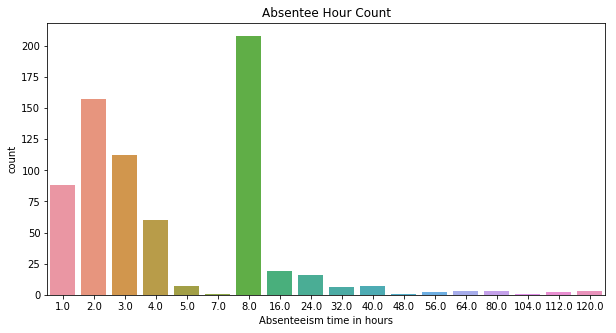

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(ffData['Absenteeism time in hours'])
plt.title('Absentee Hour Count')

Majority of the employees were Absent for 8 hours and less. That is they were absent for one whole day if its a 9 to 5 job.

## Most used Reasons for Absence.

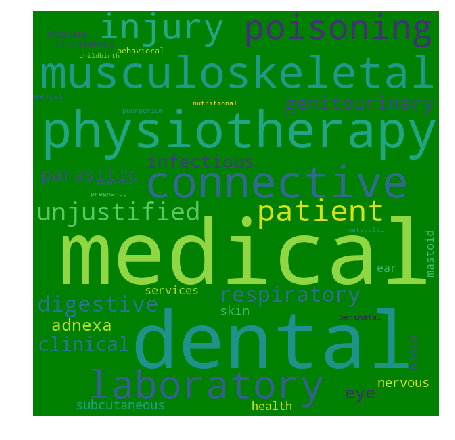

In [58]:
from wordcloud import WordCloud, STOPWORDS

'''
1 Certain infectious and parasitic diseases
2 Neoplasms
3 Diseases of the blood and blood-forming organs and certain disorders involving the immune
mechanism
4 Endocrine, nutritional and metabolic diseases
5 Mental and behavioral disorders
6 Diseases of the nervous system
7 Diseases of the eye and adnexa
8 Diseases of the ear and mastoid process
9 Diseases of the circulatory system
10 Diseases of the respiratory system
11 Diseases of the digestive system
12 Diseases of the skin and subcutaneous tissue
13 Diseases of the musculoskeletal system and connective tissue
14 Diseases of the genitourinary system
15 Pregnancy, childbirth and the puerperium
16 Certain conditions originating in the perinatal period
17 Congenital malformations, deformations and chromosomal abnormalities
18 Symptoms, signs and abnormal clinical and laboratory findings, not elsewhere classified
19 Injury, poisoning and certain other consequences of external causes
20 External causes of morbidity and mortality
21 Factors influencing health status and contact with health services.

patient follow-up (22), medical consultation (23), blood donation (24),
laboratory examination (25), unjustified absence (26), physiotherapy (27), dental consultation (28).
'''

mapping = {
    1 : 'infectious parasitic',
    2 : 'neoplasms',
    3 : 'blood blood-forming immune',
    4 : 'endocrine nutritional metabolic',
    5 : 'mental behavioral',
    6 : 'nervous',
    7 : 'eye adnexa',
    8 : 'ear mastoid',
    9 : 'circulatory',
    10 : 'respiratory',
    11 : 'digestive',
    12 : 'skin subcutaneous',
    13 : 'musculoskeletal connective',
    14 : 'genitourinary',
    15 : 'pregnancy childbirth puerperium',
    16 : 'perinatal',
    17 : 'congenital malformations deformations chromosomal',
    18 : 'clinical laboratory',
    19 : 'injury poisoning',
    20 : 'morbidity mortality',
    21 : 'health status services',
    22 : 'patient',
    23 : 'medical',
    24 : 'blood',
    25 : 'laboratory',
    26 : 'unjustified',
    27 : 'physiotherapy',
    28 : 'dental'
}

reasons = list(ffData['Reason for absence'])
fString = ' '
for res in reasons:
    fString += mapping[int(res)] + ' '
    
wordcloud = WordCloud(width = 600, height = 600, 
                background_color ='green', 
                collocations = False,
                min_font_size = 10).generate(fString) 
  
plt.figure(figsize = (6, 6), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

Took important medical terms from each reason and checked which medical term was used the most. It turned out to be Medical word was used most which corresponds to reason 23 and dental was used second most which corresponds to reason 28.

## A look into Absentees with more than 8 hours.

In [20]:
def change(col):
    if col[0] <= 21:
        return 1
    else:
        return 0
    
ffData['icd_attested'] = ffData[['Reason for absence']].apply(change, axis=1)

In [21]:
temp = ffData[ffData['Absenteeism time in hours'] > 8.0]

Text(0.5, 0, 'Absenteesim attested by ICD')

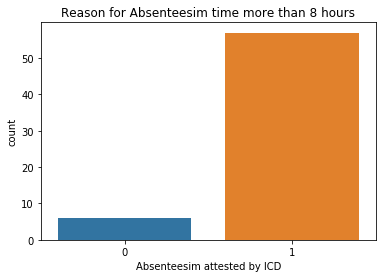

In [22]:
sns.countplot(temp['icd_attested'])
plt.title('Reason for Absenteesim time more than 8 hours')
plt.xlabel('Absenteesim attested by ICD')

57 of 63 with high absenteesim time have Absences attested by the International Code of Diseases (ICD). Hence it must have been due to some serious disease which made impossible for the employer to get to the office for many hours.

Text(0.5, 0, 'Count')

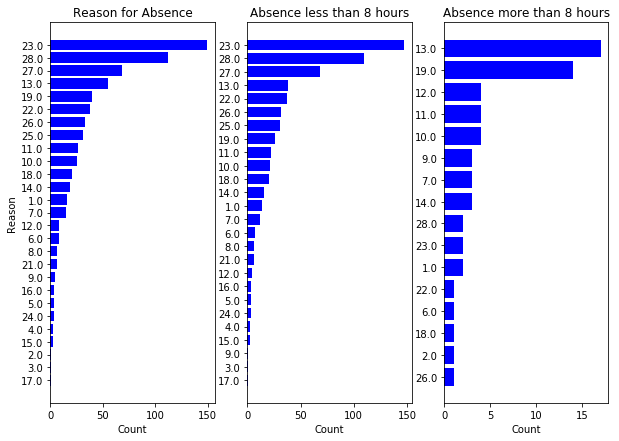

In [23]:
#temp[temp['icd_attested'] == 1]['Reason for absence']

fig, axes = plt.subplots(1, 3)
fig.set_figheight(7, 7)
fig.set_figwidth(10, 10)

freq = {}
val = list(ffData['Reason for absence'])
for v in val:
    if v in freq:
        freq[v] += 1
    else:
        freq[v] = 1
freq_s = sorted(freq.items(), key=lambda t : t[1])
x = [str(t[0]) for t in freq_s]
y = [t[1] for t in freq_s]
axes[0].barh(x, y, color='blue')
axes[0].set_title('Reason for Absence')
axes[0].set_xlabel('Count')
axes[0].set_ylabel('Reason')

t1 = ffData[ffData['Absenteeism time in hours'] <= 8.0]
freq2 = {}
val2 = list(t1['Reason for absence'])
for v in val2:
    if v in freq2:
        freq2[v] += 1
    else:
        freq2[v] = 1
freq_s = sorted(freq2.items(), key=lambda t : t[1])
x = [str(t[0]) for t in freq_s]
y = [t[1] for t in freq_s]
axes[1].barh(x, y, color='blue')
axes[1].set_title('Absence less than 8 hours')
axes[1].set_xlabel('Count')

t2 = ffData[ffData['Absenteeism time in hours'] > 8.0]
freq3 = {}
val3 = list(t2['Reason for absence'])
for v in val3:
    if v in freq3:
        freq3[v] += 1
    else:
        freq3[v] = 1
freq_s = sorted(freq3.items(), key=lambda t : t[1])
x = [str(t[0]) for t in freq_s]
y = [t[1] for t in freq_s]
axes[2].barh(x, y, color='blue')
axes[2].set_title('Absence more than 8 hours')
axes[2].set_xlabel('Count')


### Weight vs BMI

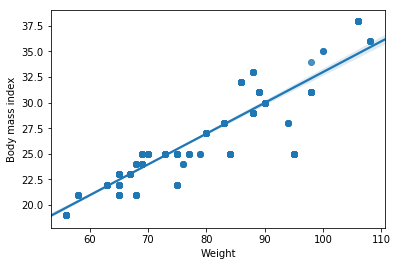

In [24]:
sns.regplot(fData['Weight'], fData['Body mass index'])

## Smoking and Drinking

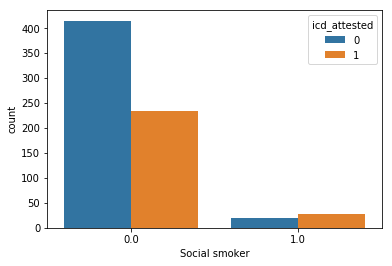

In [28]:
sns.countplot(ffData["Social smoker"], hue=ffData['icd_attested'])

#### Smoking is bad for health.

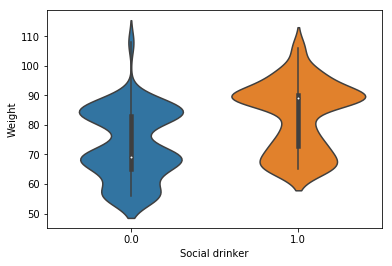

In [29]:
sns.violinplot(ffData["Social drinker"], ffData['Weight'])

#### Alcohol can cause weight gain in four ways: it stops your body from burning fat, it's high in kilojoules, it can make you feel hungry , and it can lead to poor food choices.

## Service Time

### Service Time vs Age

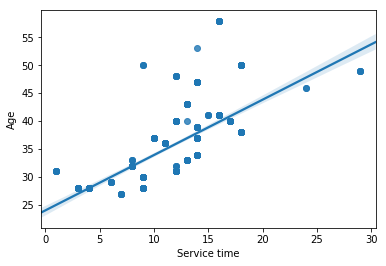

In [30]:
sns.regplot(fData['Service time'], fData['Age'])

#### Service time indicates how many years he worked for that company.

### Service Time vs Total Absent Time

AttributeError: 'Figure' object has no attribute 'sup_xlabel'

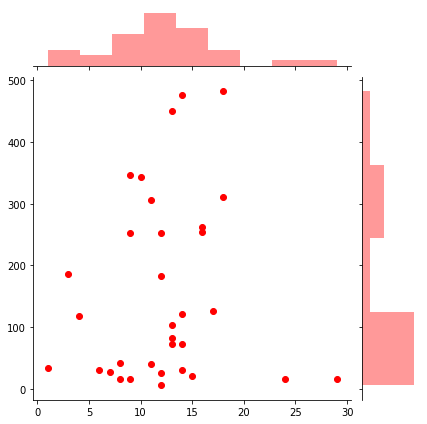

In [87]:
g_data = ffData.groupby('ID')

a = list(ffData['ID'])
b = list(ffData['Service time'])
store = {}
for i in range(len(a)):
    if a[i] not in store:
        store[a[i]] = b[i]

abs_total = dict(g_data['Absenteeism time in hours'].sum())

x = []
y = []
for k in abs_total:
    x.append(store[k])
    y.append(abs_total[k])

p = sns.jointplot(x=x,y=y, kind='scatter', color='red')
plt.xlabel("Service time of the Employer")
plt.ylabel("Total absent time of Employer")
p.fig.suptitle("Service time vs Total absent time")

## Pet and Son vs Absteesim Time.

In [60]:
def binaryP(col):
    if col[0] == 1:
        return 'Have Pets'
    else:
        return 'No Pets'
    
def binaryC(col):
    if col[0] == 1:
        return 'Have Children'
    else:
        return 'No Children'
    
def ds(cols):
    d = cols[0]
    s = cols[1]
    
    if d == 0 and s == 0:
        return 'None'
    if d == 0 and s == 1:
        return 'Smoker'
    if d == 1 and s == 0:
        return 'Drinker'
    return 'Drinker & Smoker'
    
fData['Have Children?'] = fData[['Son']].apply(binaryC, axis=1)
fData['Have Pets?'] = fData[['Pet']].apply(binaryP, axis=1)
fData['Drinker or Smoker'] = fData[['Social drinker', 'Social smoker']].apply(ds, axis=1)

In [62]:
import numpy as np

def logT(col):
    return np.log(col[0]+1)

fData['Absent time log'] = fData[['Absenteeism time in hours']].apply(logT, axis=1)

<Figure size 1080x1080 with 0 Axes>

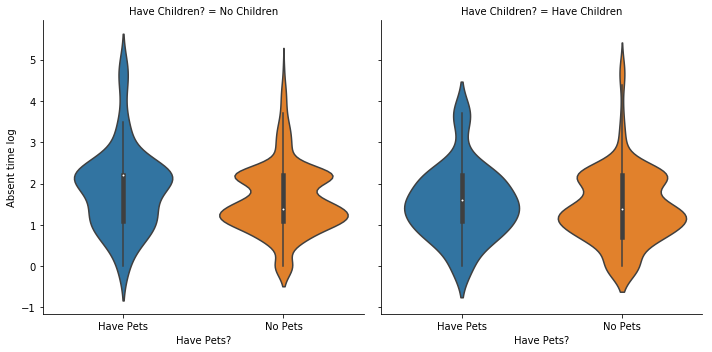

In [63]:
plt.figure(figsize=(15, 15))
sns.catplot(y="Absent time log",x="Have Pets?",kind='violin',data=fData,col='Have Children?')

#### Seems like family is not the reason for Absent time.

## Feature Importance Using Tree Based Models

### 1. Extra Tree Classifier.

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


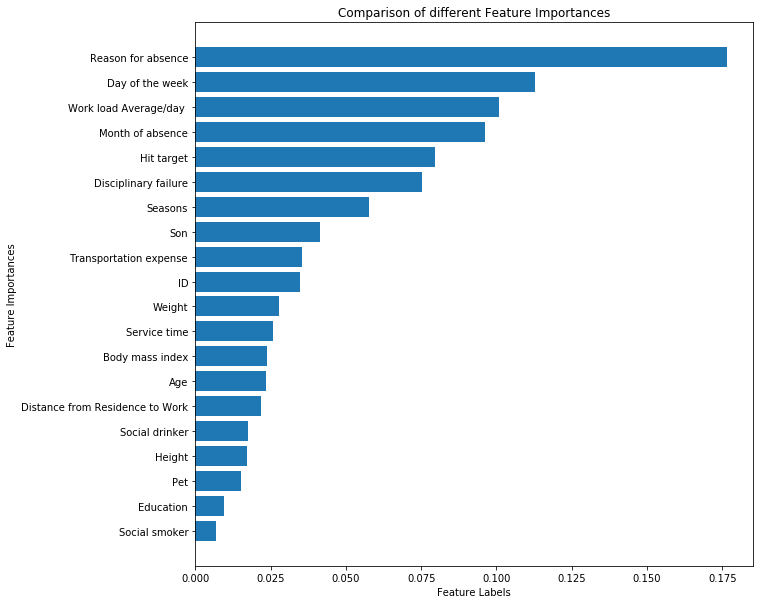

In [195]:
from sklearn.ensemble import ExtraTreesClassifier 

train = fData.drop('Absenteeism time in hours', axis=1)
labels = pd.DataFrame(fData['Absenteeism time in hours'], columns=['Absenteeism time in hours'])

extra_tree_forest = ExtraTreesClassifier(n_estimators = 5, criterion ='entropy') 
extra_tree_forest.fit(train, labels) 
feature_importance = extra_tree_forest.feature_importances_

feats = {}
imp = list(train.columns)
for i in range(len(imp)):
    feats[imp[i]] = feature_importance[i]
imps_s = sorted(feats.items(), key=lambda t : t[1])
x = [str(t[0]) for t in imps_s]
y = [t[1] for t in imps_s]
plt.figure(figsize=(10, 10))
plt.barh(x, y) 
plt.xlabel('Feature Labels') 
plt.ylabel('Feature Importances') 
plt.title('Comparison of different Feature Importances') 
plt.show()

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
C:\Users\HP\Anaconda3\lib\site-packages\sklearn\utils\validation.py:72: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


<BarContainer object of 20 artists>

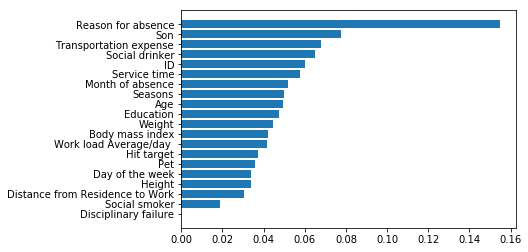

In [192]:
from xgboost import XGBClassifier

xgb = XGBClassifier()
xgb.fit(train, labels)

cols = list(train.columns)
imps = xgb.feature_importances_

col_imp = {}
for i in range(len(cols)):
    col_imp[cols[i]] = imps[i]

col_imp = sorted(col_imp.items(), key=lambda t : t[1])
x = [t[0] for t in col_imp]
y = [t[1] for t in col_imp]

plt.barh(x, y)

## Employeer total absteesim time (From highest to lowest)

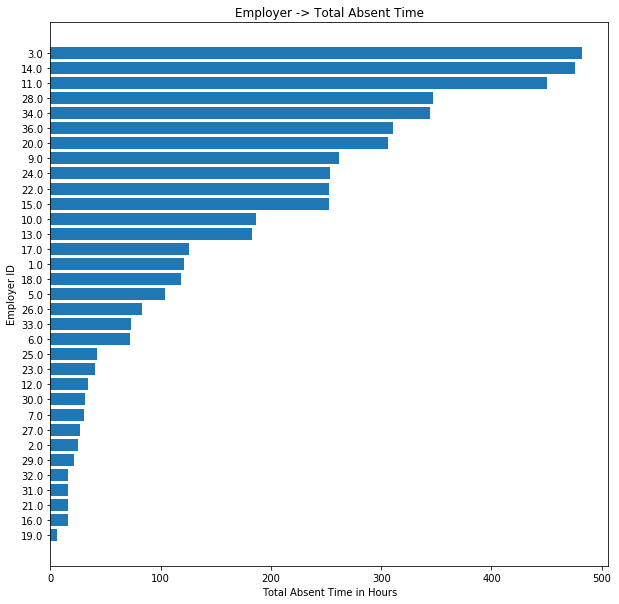

In [39]:
ids_abs_time = dict(ffData.groupby('ID')['Absenteeism time in hours'].sum())

s = sorted(ids_abs_time.items(), key=lambda t : t[1])
x = [str(t[0]) for t in s]
y = [t[1] for t in s]
plt.figure(figsize=(10, 10))
plt.barh(x, y) 
plt.xlabel('Total Absent Time in Hours') 
plt.ylabel('Employer ID') 
plt.title('Employer -> Total Absent Time') 
plt.show()

## Employeers Absteesim count (From highest to lowest)

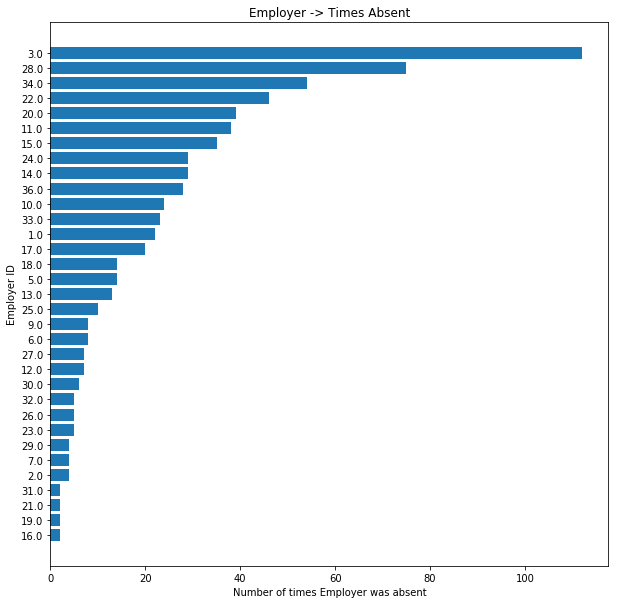

In [40]:
ids_abs_time = dict(ffData.groupby('ID')['Absenteeism time in hours'].count())

s = sorted(ids_abs_time.items(), key=lambda t : t[1])
x = [str(t[0]) for t in s]
y = [t[1] for t in s]
plt.figure(figsize=(10, 10))
plt.barh(x, y) 
plt.xlabel('Number of times Employer was absent') 
plt.ylabel('Employer ID') 
plt.title('Employer -> Times Absent') 
plt.show()

## How Seasons affect Transportation cost and Absenteesim Time?

Text(0.5, 1.0, 'Transportation Expense Mean Per Season')

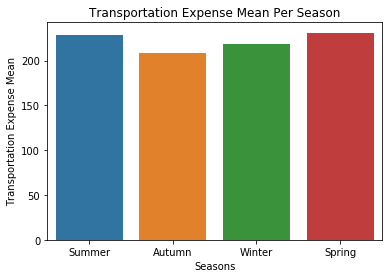

In [11]:
y = list(fData.groupby('Seasons')['Transportation expense'].mean())
x = ['Summer', 'Autumn', 'Winter', 'Spring']
sns.barplot(x, y)
plt.xlabel('Seasons')
plt.ylabel('Transportation Expense Mean')
plt.title('Transportation Expense Mean Per Season')

Text(0.5, 1.0, 'Seasons vs Total Absenteesim Time')

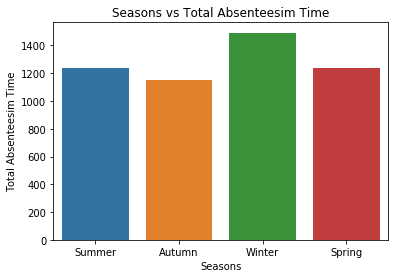

In [68]:
y = list(ffData.groupby('Seasons')['Absenteeism time in hours'].sum())
x = ['Summer', 'Autumn', 'Winter', 'Spring']
sns.barplot(x, y)
plt.xlabel('Seasons')
plt.ylabel('Total Absenteesim Time')
plt.title('Seasons vs Total Absenteesim Time')

Text(0.5, 1.0, 'Seasons vs Total Absenteesim Count')

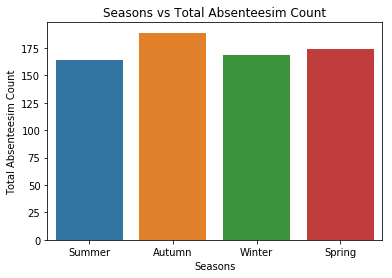

In [69]:
y = list(ffData.groupby('Seasons')['Absenteeism time in hours'].count())
x = ['Summer', 'Autumn', 'Winter', 'Spring']
sns.barplot(x, y)
plt.xlabel('Seasons')
plt.ylabel('Total Absenteesim Count')
plt.title('Seasons vs Total Absenteesim Count')

## Pet vs Absenteesim Time

Text(0.5, 1.0, 'Pet Count vs Total Absenteesim Time')

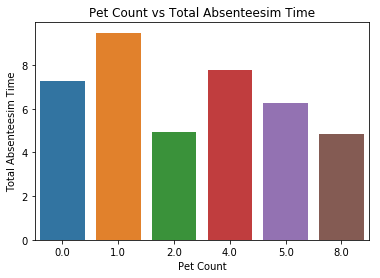

In [77]:
store = dict(ffData.groupby('Pet')['Absenteeism time in hours'].mean())
x = [k for k in store]
y = [store[k] for k in store]
sns.barplot(x, y)
plt.xlabel('Pet Count')
plt.ylabel('Total Absenteesim Time')
plt.title('Pet Count vs Total Absenteesim Time')

Text(0.5, 1.0, 'Pet Count vs Total Absenteesim Count')

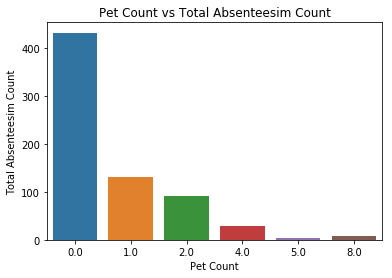

In [75]:
store = dict(ffData.groupby('Pet')['Absenteeism time in hours'].count())
x = [k for k in store]
y = [store[k] for k in store]
sns.barplot(x, y)
plt.xlabel('Pet Count')
plt.ylabel('Total Absenteesim Count')
plt.title('Pet Count vs Total Absenteesim Count')

## Son vs Abseentism Time

Text(0.5, 1.0, 'Children Count vs Total Absenteesim Time')

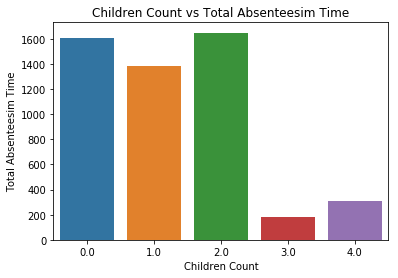

In [77]:
store = dict(ffData.groupby('Son')['Absenteeism time in hours'].sum())
x = [k for k in store]
y = [store[k] for k in store]
sns.barplot(x, y)
plt.xlabel('Children Count')
plt.ylabel('Total Absenteesim Time')
plt.title('Children Count vs Total Absenteesim Time')

Text(0.5, 1.0, 'Children Count vs Total Absenteesim Count')

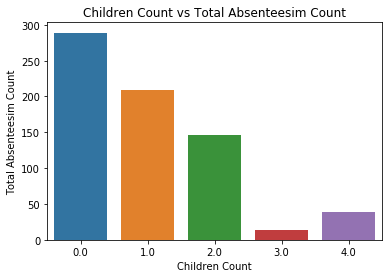

In [78]:
store = dict(ffData.groupby('Son')['Absenteeism time in hours'].count())
x = [k for k in store]
y = [store[k] for k in store]
sns.barplot(x, y)
plt.xlabel('Children Count')
plt.ylabel('Total Absenteesim Count')
plt.title('Children Count vs Total Absenteesim Count')

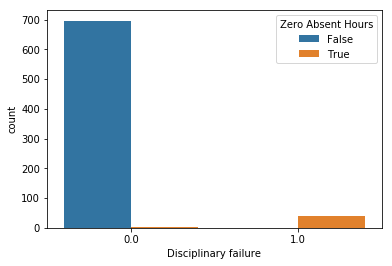

In [24]:
def isZero(col):
    return col[0] == 0

fData['Zero Absent Hours'] = fData[['Absenteeism time in hours']].apply(isZero, axis=1)

sns.countplot(fData['Disciplinary failure'], hue=fData['Zero Absent Hours'])

In [25]:
fData.drop('Is Abs Hours Zero', axis=1, inplace=True)

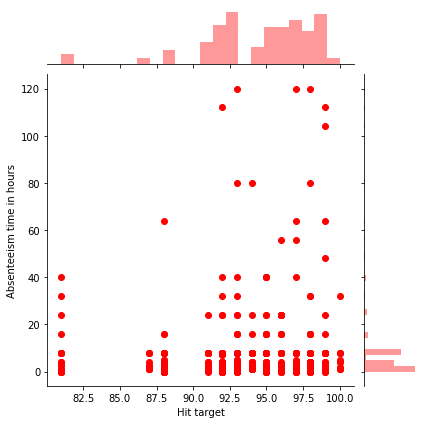

In [34]:
sns.jointplot(fData['Hit target'], fData['Absenteeism time in hours'], color='red')

Text(0, 0.5, 'Average work load per day')

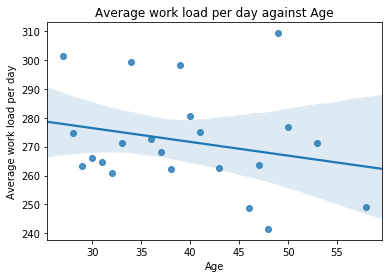

In [53]:
temp = fData.groupby('Age')
store = dict(temp['Work load Average/day '].mean())
edu = dict(temp['Education'].max())

x = [k for k in store]
y = [store[k] for k in store]
#z = [edu[k] for k in store]

sns.regplot(x, y)
plt.title('Average work load per day against Age')
plt.xlabel('Age')
plt.ylabel('Average work load per day')

In [45]:
temp = fData.groupby('Age')
store = dict(temp['Education'].max())

In [47]:
len(store)

22

In [48]:
len(dict(temp['Work load Average/day '].mean()))

22

Text(0, 0.5, 'Highest Education')

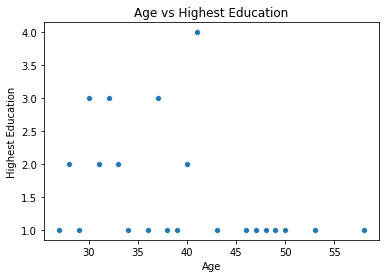

In [52]:
temp = fData.groupby('Age')
store = dict(temp['Education'].max())

x = [k for k in store]
y = [store[k] for k in store]

sns.scatterplot(x, y)
plt.title('Age vs Highest Education')
plt.xlabel('Age')
plt.ylabel('Highest Education')

Text(0, 0.5, 'Reason')

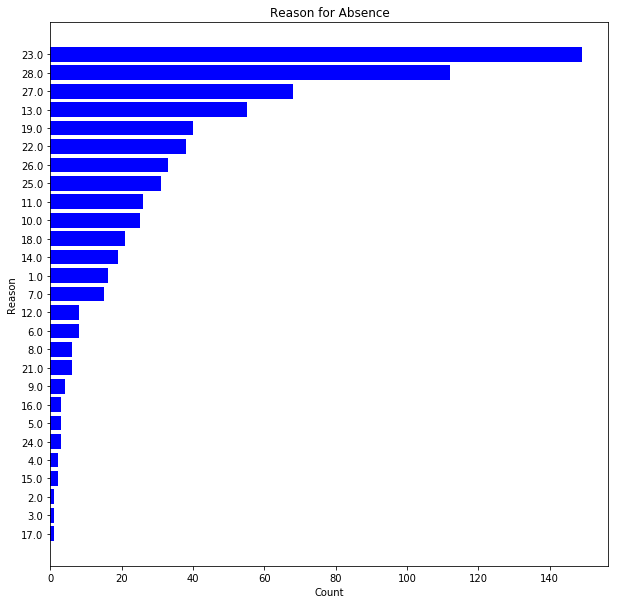

In [67]:
#removing absenteeism time with zeros as they will not have any reason.

freq = {}
val = list(ffData['Reason for absence'])
for v in val:
    if v in freq:
        freq[v] += 1
    else:
        freq[v] = 1
freq_s = sorted(freq.items(), key=lambda t : t[1])
x = [str(t[0]) for t in freq_s]
y = [t[1] for t in freq_s]
plt.figure(figsize=(10, 10))
plt.barh(x, y, color='blue')
plt.title('Reason for Absence')
plt.xlabel('Count')
plt.ylabel('Reason')

Text(0, 0.5, 'Highest Education')

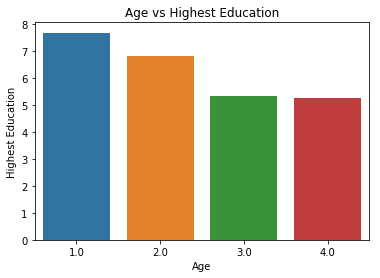

In [74]:
temp = ffData.groupby('Education')
store = dict(temp['Absenteeism time in hours'].mean())

x = [k for k in store]
y = [store[k] for k in store]

sns.barplot(x, y)
plt.title('Age vs Highest Education')
plt.xlabel('Age')
plt.ylabel('Highest Education')

Text(0, 0.5, 'Highest Education')

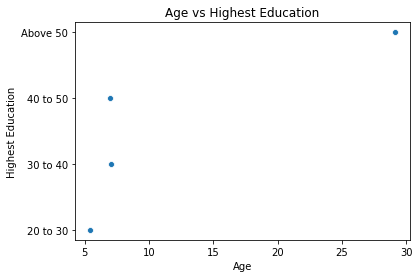

In [76]:
def ds(col):
    
    if col[0] > 50:
        return 'Above 50'
    if col[0] > 40:
        return '40 to 50'
    if col[0] > 30:
        return '30 to 40'
    if col[0] > 20:
        return '20 to 30'
    
fData['age_group'] = fData[['Age']].apply(ds, axis=1)


temp = fData.groupby('age_group')
store = dict(temp['Absenteeism time in hours'].mean())

x = [k for k in store]
y = [store[k] for k in store]

sns.scatterplot(y, x)
plt.title('Age vs Highest Education')
plt.xlabel('Age')
plt.ylabel('Highest Education')